In [1]:
import torch
import torch.optim as optim
import numpy as np
from maze_env import MazeEnv
from policy_network import PolicyNetwork
from sum_utils import train_agent_REINFORCE, train_agent_PPO

from policies import epsilon_greedy_policy, pure_stochastic
import matplotlib.pyplot as plt

In [18]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


In [3]:

env = MazeEnv()

num_episodes = 1000
maze_size = (9, 9)

action_dim = env.action_space.n
print(action_dim)

4


In [4]:
maze_input_dim = np.prod(maze_size)
pos_input_dim = np.prod(maze_size)
policy = pure_stochastic

In [5]:
policy_net_rf = PolicyNetwork(maze_input_dim, pos_input_dim, action_dim).to(device)
optimizer_rf = optim.Adam(policy_net_rf.parameters(), lr=1e-2)

In [9]:
reward_logs_rf = train_agent_REINFORCE(
    env, policy_net_rf, policy, optimizer_rf, num_episodes, maze_size, device
)

Episode 1: Total Reward: 0.97
Episode 2: Total Reward: 0.94
Episode 3: Total Reward: 0.99
Episode 4: Total Reward: 0.83
Episode 5: Total Reward: 0.95
Episode 6: Total Reward: 0.92
Episode 7: Total Reward: 0.99
Episode 8: Total Reward: 0.91
Episode 9: Total Reward: 0.97
Episode 10: Total Reward: 0.9
Episode 11: Total Reward: 0.98
Episode 12: Total Reward: 0.99
Episode 13: Total Reward: 0.99
Episode 14: Total Reward: 0.99
Episode 15: Total Reward: 0.99
Episode 16: Total Reward: 0.94
Episode 17: Total Reward: 0.97
Episode 18: Total Reward: 0.99
Episode 19: Total Reward: 0.86
Episode 20: Total Reward: 0.91
Episode 21: Total Reward: 0.99
Episode 22: Total Reward: 0.98
Episode 23: Total Reward: 0.99
Episode 24: Total Reward: 0.99
Episode 25: Total Reward: 0.97
Episode 26: Total Reward: 0.97
Episode 27: Total Reward: 0.9
Episode 28: Total Reward: 0.9299999999999999
Episode 29: Total Reward: 0.98
Episode 30: Total Reward: 0.86
Episode 31: Total Reward: 0.84
Episode 32: Total Reward: 0.99
Episo

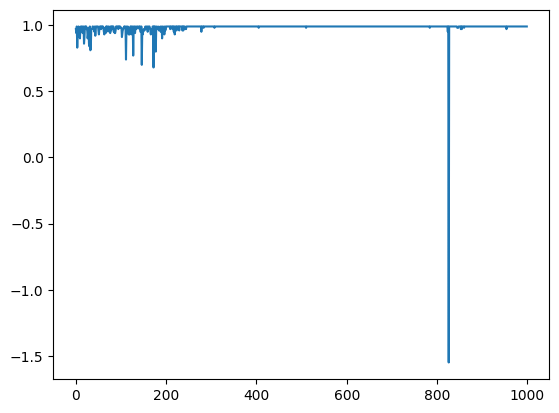

In [11]:
xs = [x for x in range(len(reward_logs_rf))]

plt.plot(xs, reward_logs_rf)
plt.show()

In [12]:
policy_net_ppo = PolicyNetwork(maze_input_dim, pos_input_dim, action_dim).to(device)
optimizer_ppo = optim.Adam(policy_net_ppo.parameters(), lr=1e-2)

In [14]:
reward_logs_ppo = train_agent_PPO(
env, policy_net_ppo, policy, optimizer_ppo, num_episodes, maze_size, device
)

Episode 1: Total Reward: 0.88
Episode 2: Total Reward: 0.99
Episode 3: Total Reward: 0.99
Episode 4: Total Reward: 0.96
Episode 5: Total Reward: 0.9299999999999999
Episode 6: Total Reward: 0.9299999999999999
Episode 7: Total Reward: 0.9
Episode 8: Total Reward: 0.97
Episode 9: Total Reward: 0.97
Episode 10: Total Reward: 0.85
Episode 11: Total Reward: 0.99
Episode 12: Total Reward: 0.95
Episode 13: Total Reward: 0.96
Episode 14: Total Reward: 0.92
Episode 15: Total Reward: 0.97
Episode 16: Total Reward: 0.98
Episode 17: Total Reward: 0.97
Episode 18: Total Reward: 0.94
Episode 19: Total Reward: 0.96
Episode 20: Total Reward: 0.97
Episode 21: Total Reward: 0.8099999999999999
Episode 22: Total Reward: 0.94
Episode 23: Total Reward: 0.9299999999999999
Episode 24: Total Reward: 0.91
Episode 25: Total Reward: 0.87
Episode 26: Total Reward: 0.99
Episode 27: Total Reward: 0.99
Episode 28: Total Reward: 0.7999999999999999
Episode 29: Total Reward: 0.86
Episode 30: Total Reward: 0.91
Episode 31

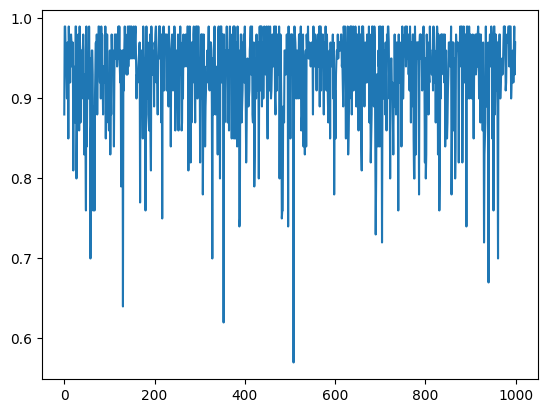

In [17]:
xs = [x for x in range(len(reward_logs_ppo))]

plt.plot(xs, reward_logs_ppo)
plt.show()

# Machine learning

## DPR

## Bayes Model

## Random processes

### Distributions

# Deep Neural Networks

## Layers

### Deep

### Convolution

### Recurrent

### LSTM

### Graph

# Reinforcement Learning

## Bellmann

## Bellman Equation for Value Functions

The **Bellman equation** for value functions captures the relationship between the value of a state and the values of subsequent states in a reinforcement learning context. It provides a recursive decomposition of the value function, which is central to solving reinforcement learning problems.

Given a policy $\pi$, the value function $V^\pi(s)$ of a state $s$ under policy $\pi$ is defined as the expected return starting from state $s$, and then following policy $\pi$. The Bellman equation for the value function under policy $\pi$ is:

$$V^\pi(s) = \sum_{a \in A} \pi(a|s) \sum_{s', r} p(s', r | s, a) \left[ r + \gamma V^\pi(s') \right]$$

Where:

- $V^\pi(s)$ is the value of state $s$ under policy $\pi$,
- $\pi(a|s)$ denotes the probability of taking action $a$ in state $s$ under policy $\pi$,
- $p(s', r | s, a)$ is the transition probability to state $s'$ with reward $r$ after taking action $a$ in state $s$,
- $\gamma$ is the discount factor, which quantifies the difference in importance between future rewards and present rewards.

## Bellman Optimality Equation

The **Bellman Optimality Equation** pertains to the optimal policy, defining the best possible value function, known as the optimal value function. It describes the value of the best action to take in a given state.

The Bellman Optimality Equation for the optimal value function $V^*(s)$ is:

$$V^*(s) = \max_{a \in A} \sum_{s', r} p(s', r | s, a) \left[ r + \gamma V^*(s') \right]$$

For the action-value function $Q^*(s, a)$, which represents the value of taking action $a$ in state $s$ and then following the optimal policy, the equation is:

$$Q^*(s, a) = \sum_{s', r} p(s', r | s, a) \left[ r + \gamma \max_{a'} Q^*(s', a') \right]$$

Where:

- $V^*(s)$ and $Q^*(s, a)$ are the optimal value and action-value functions, respectively,
- The $\max$ operator is used to select the action that maximizes the expected return.

## Summary

The Bellman equations offer a recursive solution to determining value functions in reinforcement learning. They form the theoretical foundation for dynamic programming techniques such as Value Iteration and Policy Iteration, which seek to find optimal policies by improving value function estimates iteratively.

## Methodologies

## Training Methods

## Value Estimation and Policy Estimation

In reinforcement learning (RL), learning optimal behaviors involves two fundamental concepts: **value estimation** and **policy estimation**. They are crucial for navigating the environment but approach the problem differently.

### Value Estimation

Value estimation determines the worth of states (or state-action pairs). The "value" indicates the expected cumulative rewards from that state (or after taking an action) following a policy.

- **State Value Function (V)**: $V^\pi(s)$ is the expected return from state $s$ following policy π, showing how good it is to be in that state.

- **Action Value Function (Q)**: $Q^\pi(s, a)$ is the expected return from taking action $a$ in state $s$ following policy π, indicating the worth of an action in a state.

Value estimation is key in methods like Dynamic Programming and Temporal Difference Learning, focusing on improving value function estimations.

### Policy Estimation

Policy estimation directly determines the best action in a given state. It seeks to learn or improve the policy based on received rewards to maximize cumulative rewards.

- **Deterministic Policies**: Specify a single action for each state. Policy $\pi(s)$ maps to action $a$.

- **Stochastic Policies**: Provide action probabilities in a state. Policy $\pi(a|s)$ gives the probability of taking action $a$ in state $s$.

Policy estimation methods, like Policy Gradient and Actor-Critic, focus on learning or improving the policy directly.

### Key Differences

- **Objective Focus**: Value estimation evaluates the expected returns of states or actions. Policy estimation identifies the best action in each state.

- **Approach**: Value estimation methods evaluate without specifying action selection, while policy estimation explicitly defines action selection strategies.

- **Dependency**: Policy estimation can benefit from value estimation but can also be independent.

- **Applications**: Value estimation is foundational for many RL algorithms, understanding the environment's dynamics. Policy estimation determines the optimal interaction strategy.

Both value and policy estimation are crucial for effective reinforcement learning algorithms, encompassing action evaluation and decision-making aspects.

# Policies

## On-Policy vs. Off-Policy Learning

In reinforcement learning (RL), on-policy and off-policy learning distinguish how the learning algorithm utilizes data generated by the agent's policy.

### On-Policy Learning

On-policy methods learn the value of the policy being used for decisions. The exploration and the evaluated policy are the same, with the agent learning from its own actions.

- **Example**: SARSA is an on-policy algorithm that updates the action-value function based on the current policy's actions.

### Off-Policy Learning

Off-policy methods learn the optimal policy's value independently of the agent's actions, allowing learning from observed or hypothetical actions not taken by the behavior policy.

- **Example**: Q-Learning is an off-policy method that updates the action-value function using the maximum reward from the next state, regardless of the behavior policy's action.

### Key Differences

- **Policy Alignment**: On-policy aligns exploration with the target policy. Off-policy separates the exploration and target policies, learning an optimal policy from any actions.

- **Data Utilization**: On-policy methods explore and learn with the same policy, possibly leading to slower convergence. Off-policy methods can learn from any policy's data, offering more data efficiency.

- **Flexibility and Complexity**: Off-policy methods are more flexible but complex, learning from any data source. On-policy methods are straightforward but may require efficient exploration strategies.

- **Application Scenarios**: On-policy is suited for environments where exploration with the improving policy is feasible. Off-policy is beneficial where exploration is costly or when learning from a dataset of experiences generated by different policies.

### Ideas for Off-policy Learning

### Importance Sampling

Importance Sampling is a statistical technique used to estimate properties of a particular distribution, while only having samples generated from a different distribution. This method is especially useful in scenarios where direct sampling from the target distribution is challenging or inefficient. It finds extensive application in various fields, including Bayesian statistics, Monte Carlo simulation, and reinforcement learning (RL), particularly in off-policy learning algorithms.

#### Basic Concept

Consider you want to estimate the expected value of a function $f(x)$ under a probability distribution $p(x)$, but sampling from $p(x)$ is difficult. Instead, you have samples from a different distribution $q(x)$. Importance Sampling allows you to estimate the expected value under $p(x)$ using samples from $q(x)$ by reweighting the samples according to how probable they are under $p(x)$ compared to $q(x)$.

The estimator for the expected value of $f(x)$ under $p(x)$ is given by:

$$ \hat{E}[f(x)] = \frac{1}{N} \sum\_{i=1}^{N} \frac{p(x_i)}{q(x_i)} f(x_i) $$

where $x_i$ are samples drawn from $q(x)$, and $\frac{p(x_i)}{q(x_i)}$ are the importance weights.

#### Importance in Reinforcement Learning

In RL, particularly in off-policy algorithms, importance sampling is used to correct the bias introduced when learning from actions that were chosen according to a different policy (behavior policy) than the one being evaluated or optimized (target policy). This adjustment allows the agent to learn effectively from experiences generated by an exploratory or an old policy.

## Deterministic and Stochastic Policies in Reinforcement Learning

In reinforcement learning (RL), policies guide agent decisions, crucial for maximizing cumulative rewards. Policies are either deterministic or stochastic, each with unique applications.

### Deterministic Policies

Deterministic policies prescribe a single action for each state, offering clear, unambiguous direction. Represented as $ \pi: S \rightarrow A $, for state $ s $, $ \pi(s) $ outputs action $ a $.

- **Example Usage**: Used in predictable environments where the best action per state is clearly defined.

### Stochastic Policies

Stochastic policies assign probabilities over actions for each state, allowing for exploration and handling uncertainties. Represented as $ \pi(a|s) $, indicating the likelihood of action $ a $ in state $ s $.

- **Example Usage**: Useful in uncertain environments or for exploration, modeling randomness in action outcomes.

### Key Differences

- **Action Selection**: Deterministic policies select one action; stochastic policies provide action probabilities.
- **Exploration vs. Exploitation**: Deterministic policies exploit known strategies; stochastic policies explore various actions.
- **Adaptability**: Stochastic policies adapt better to changing or uncertain environments.
- **Complexity**: Stochastic policies are complex due to managing and adjusting probabilities.

### Applications

- **Deterministic Policies**: Suited for static, predictable environments.
- **Stochastic Policies**: Ideal for uncertain environments or when exploration improves learning.

The choice between deterministic and stochastic policies affects agent learning, exploration, and performance in various environments.

## Value Iteration Algorithm

Value iteration is a dynamic programming algorithm used in reinforcement learning to find the optimal policy by iteratively improving the value function of each state. It utilizes the Bellman optimality equation during the update process.

#### Steps of the Value Iteration Algorithm:

1. **Initialization**: Start with an arbitrary value function $V_0$ for all states, usually initialized to zero.

2. **Iteration**:
   For each state $s$ in the state space $S$, update the value function using the Bellman optimality equation:

   $$
   V_{k+1}(s) = \max_{a \in A} \sum_{s', r} P(s', r | s, a) [r + \gamma V_k(s')]
   $$

   - $V_{k+1}(s)$ is the updated value at iteration $k+1$.
   - $A$ is the set of actions.
   - $P(s', r | s, a)$ is the transition probability.
   - $\gamma$ is the discount factor.
   - $V_k(s')$ is the value at iteration $k$.

3. **Convergence Check**: Repeat until the value function changes less than a small threshold $\theta$ for all states.

4. **Policy Extraction**: Derive the optimal policy $\pi^*$ by choosing the action that maximizes the expected utility for each state, based on the converged value function:
   $$
   \pi^*(s) = \arg\max_{a \in A} \sum_{s', r} P(s', r | s, a) [r + \gamma V(s')]
   $$

```python

def value_iteration(states, actions, transition_probabilities, rewards, gamma, theta):
    V = {s: 0 for s in states}  # Initialize value function
    policy = {s: None for s in states}  # Initialize policy

    while True:
        delta = 0
        for s in states:
            v = V[s]
            V[s] = max([sum([transition_probabilities[s][a][s_prime] * (rewards[s][a][s_prime] + gamma * V[s_prime]) for s_prime in states]) for a in actions])
            delta = max(delta, abs(v - V[s]))
        if delta < theta:  # Convergence check
            break

    for s in states:
        policy[s] = max(actions, key=lambda a: sum([transition_probabilities[s][a][s_prime] * (rewards[s][a][s_prime] + gamma * V[s_prime]) for s_prime in states]))

    return policy
```

### Flowchart Description:

- **Start** -> **Initialize $V(s)$**
- **For each state $s$ in $S$**:
  - **Update $V(s)$ using Bellman optimality**
- **Convergence Check**: If changes in $V(s)$ are small, proceed to **Policy Extraction**; else, repeat.
- **Policy Extraction**: Compute $\pi^*(s)$ for all $s$.
- **End**

## Q-Learning Algorithm

# Missing: Tabular and q learning

Q-learning is a model-free reinforcement learning algorithm that informs an agent on optimal actions by learning the value of actions directly.

### Steps of the Q-Learning Algorithm:

1. **Initialization**: Initialize Q-values $Q(s, a)$ for all state-action pairs.

2. **Episode Iteration**: For each episode:

   - **State Initialization**: Start from an initial state $s$.
   - **Action Selection**: Choose action $a$ based on a policy derived from Q-values (e.g., epsilon-greedy).

   - **Environment Interaction**: Take action $a$, observe reward $r$, and next state $s'$.

   - **Q-value Update**: Update Q-value for $(s, a)$ using:

     $$
     Q(s, a) \leftarrow Q(s, a) + \alpha [r + \gamma \max_{a'} Q(s', a') - Q(s, a)]
     $$

     where $\alpha$ is the learning rate, and $\gamma$ is the discount factor.

   - **State Update**: Set $s = s'$.

3. **Repeat** until Q-values converge or satisfactory performance is reached.

4. **Policy Extraction**: Derive optimal policy $\pi^*$ by selecting the action with the highest Q-value in each state:
   $$
   \pi^*(s) = \arg\max_{a} Q(s, a)
   $$

### Policy Gradient Methods

Policy gradient methods are a class of algorithms in reinforcement learning that optimize the policy directly by adjusting the policy parameters \(\theta\) to maximize the expected return. The policy \(\pi\_{\theta}(a|s)\) maps states to a probability distribution over actions. The goal is to find the policy parameters \(\theta\) that maximize the expected return \(J(\theta)\).

#### Objective Function

The objective function we aim to maximize, \(J(\theta)\), is the expected return:

$$ J(\theta) = \mathbb{E}_{\tau \sim \pi_{\theta}}[R(\tau)] $$

where \(\tau = (s*0, a_0, r_1, s_1, a_1, ..., s*{T-1}, a*{T-1}, r_T)\) represents a trajectory of states, actions, and rewards, \(R(\tau)\) is the return of the trajectory, and the expectation is over the distribution of trajectories induced by the policy \(\pi*{\theta}\).

#### Policy Gradient Theorem

The policy gradient theorem provides an expression for the gradient of \(J(\theta)\) with respect to the policy parameters \(\theta\), useful for gradient ascent:

$$ \nabla*{\theta} J(\theta) = \mathbb{E}*{\tau \sim \pi*{\theta}} \left[ \sum*{t=0}^{T-1} \nabla*{\theta} \log \pi*{\theta}(a_t|s_t) R(\tau) \right] $$

#### Derivation

The derivation starts with the definition of the expected return and applies the log-derivative trick:

1. **Definition of Expected Return**:
   $$ J(\theta) = \mathbb{E}_{\tau \sim \pi_{\theta}}[R(\tau)] $$

2. **Express Expectation as an Integral**:
   $$ J(\theta) = \int P(\tau ; \theta) R(\tau) d\tau $$

3. **Log-Derivative Trick**:
   $$ \nabla*{\theta} J(\theta) = \int P(\tau ; \theta) \nabla*{\theta} \log P(\tau ; \theta) R(\tau) d\tau $$

4. **Gradient of Log Probability of Trajectory**:
   $$ \nabla*{\theta} \log P(\tau ; \theta) = \sum*{t=0}^{T-1} \nabla*{\theta} \log \pi*{\theta}(a_t|s_t) $$

5. **Substitute Back to Get Policy Gradient Theorem**:
   $$ \nabla*{\theta} J(\theta) = \mathbb{E}*{\tau \sim \pi*{\theta}} \left[ \sum*{t=0}^{T-1} \nabla*{\theta} \log \pi*{\theta}(a_t|s_t) R(\tau) \right] $$

#### Conclusion

The policy gradient theorem shows that the gradient of the expected return with respect to policy parameters is the expected sum of the gradients of the log probabilities of actions, weighted by the return. This forms the basis for policy gradient methods like REINFORCE, where the gradient is estimated from samples and used to update the policy parameters in the direction of increased expected return.

### REINFORCE: Monte Carlo Policy Gradient Method

REINFORCE, also known as the Monte Carlo Policy Gradient method, optimizes reinforcement learning policies by adjusting policy parameters to maximize expected returns. It employs the policy gradient theorem for gradient ascent.

#### Algorithm Overview

REINFORCE involves the following steps:

1. **Initialize the Policy**: Represent the policy with a neural network with parameters \(\theta\), mapping states to action probabilities.

2. **Generate Episodes**: Use the current policy to generate complete episodes. An episode consists of tuples \((s*0, a_0, r_1, s_1, a_1, ..., s*{T-1}, a\_{T-1}, r_T)\) until reaching a terminal state.

3. **Compute Returns**: Calculate the return \(G*t\) for each step within each episode as \(G_t = \sum*{k=0}^{\infty} \gamma^k r\_{t+k+1}\), where \(\gamma\) is the discount factor.

4. **Policy Gradient Update**: Perform a gradient ascent on the policy parameters \(\theta\) by updating in the direction of actions leading to higher returns:
   $$ \nabla*{\theta} J(\theta) = \mathbb{E}*{\pi}\left[ \sum_{t=0}^{T-1} \nabla_{\theta} \log \pi_{\theta}(a_t|s_t) G_t \right] $$
   The gradient is estimated by averaging over the sampled episodes.

5. **Repeat**: Update the policy with new episodes and iterate the process.

#### Key Characteristics

- **Monte Carlo Method**: REINFORCE requires complete episodes for updates, making it suitable for episodic tasks.

- **Sample Efficiency**: It may suffer from sample inefficiency due to reliance on complete episodes and the potential high variance in returns.

- **Exploration**: Initially facilitated by the policy's stochastic nature, but additional mechanisms (e.g., entropy regularization) may be needed for sustained exploration.

- **No Value Function**: Unlike Actor-Critic methods, REINFORCE does not use a separate value function estimator, trading off complexity for potentially higher variance.

#### Variance Reduction Techniques

High variance in gradient estimates can slow convergence. Techniques to reduce variance include:

- **Baseline Subtraction**: Using a baseline value subtracted from the returns in the gradient estimate can reduce variance. A common baseline is a state-value function.

- **Advantage Function**: Applying the advantage function \(A(s, a) = Q(s, a) - V(s)\) instead of the direct return \(G_t\). This concept is more directly used in Actor-Critic methods.

#### Conclusion

REINFORCE offers a direct method for optimizing policy gradients based on sampled episode returns. While its simplicity is attractive, efficiency can be enhanced with variance reduction techniques or employing advanced policy gradient methods like PPO or TRPO.

## Advantage Actor-Critic (A2C) Algorithm

Advantage Actor-Critic (A2C) combines value-based and policy-based methods, using two networks: the actor for action selection and the critic for value estimation.

### Steps of the A2C Algorithm:

1. **Initialization**: Initialize actor and critic networks with random weights.

2. **Rollout**:
   - Interact with the environment to generate states, actions, rewards, and next states using the current policy.
   - Calculate the advantage estimate (TD error) for each step:
     $$
     \delta_t = r_t + \gamma V(s_{t+1}) - V(s_t)
     $$
3. **Update**:
   - **Critic Update**: Minimize the squared TD error using the critic network.
   - **Actor Update**: Maximize expected rewards adjusted by the advantage, updating the actor network with policy gradients:
     $$
     \nabla_{\theta} \log \pi_{\theta}(a_t|s_t) \delta_t
     $$
4. **Repeat**: Continue until policy convergence or a set number of iterations.

5. **Policy Extraction**: The final policy is given by the actor network's action proposals.

```python

def a2c(env, actor, critic, num_episodes, gamma):
    optimizer_actor = torch.optim.Adam(actor.parameters(), lr=1e-3)
    optimizer_critic = torch.optim.Adam(critic.parameters(), lr=1e-3)

    for episode in range(num_episodes):
        state = env.reset()
        done = False

        while not done:
            action_prob = actor(state)
            action = torch.distributions.Categorical(action_prob).sample()
            next_state, reward, done, _ = env.step(action.item())

            value = critic(state)
            next_value = critic(next_state)
            td_error = reward + gamma * next_value * (1 - int(done)) - value

            # Critic update
            critic_loss = td_error.pow(2)
            optimizer_critic.zero_grad()
            critic_loss.backward()
            optimizer_critic.step()

            # Actor update
            actor_loss = -torch.log(action_prob[action]) * td_error.detach()
            optimizer_actor.zero_grad()
            actor_loss.backward()
            optimizer_actor.step()

            state = next_state
```

# Policies for Actor

### 1. Stochastic Policies

Stochastic policies are more commonly used with Actor-Critic methods. In this approach, the actor outputs a probability distribution over actions, and actions are sampled from this distribution. This allows for exploration of the action space and can help the algorithm to find more robust solutions. The policy is typically parameterized by a neural network where the output layer corresponds to the action probabilities (for discrete actions) or parameters of a probability distribution (for continuous actions). Stochastic policies are beneficial because they naturally incorporate exploration and can handle the uncertainty in the environment.

### 2. Deterministic Policies

Deterministic policies can also be used, especially in algorithms like DDPG (Deep Deterministic Policy Gradient), which is an Actor-Critic method designed for continuous action spaces. In deterministic policies, the actor directly outputs the action to take without any stochasticity. This approach is more straightforward and can be more efficient in environments where the optimal policy is believed to be deterministic. However, deterministic policies might require additional mechanisms to ensure sufficient exploration of the action space.

### 3. Soft Policies

Soft policies, used in algorithms like Soft Actor-Critic (SAC), are a type of stochastic policy that explicitly encourages exploration by adding an entropy term to the objective function. This term rewards the policy for being uncertain, effectively balancing exploration with exploitation. The soft policy aims to maximize not only the expected return but also the entropy of the policy, leading to more exploratory behavior. This approach is especially useful in complex environments with multiple local optima.

### 4. Epsilon-Greedy (in Discrete Action Spaces)

While not directly a policy type used within the actor model, epsilon-greedy is a strategy often discussed in the context of exploration in RL. For Actor-Critic methods, especially in discrete action spaces, an epsilon-greedy approach can be adapted where the actor's suggested action is usually followed, but occasionally (with probability epsilon), a random action is chosen. This method is more common in value-based methods but can be adapted for Actor-Critic methods to encourage exploration.

### Conclusion

The choice between stochastic, deterministic, and soft policies in Actor-Critic methods depends on the specific requirements of the environment and the problem being solved. Stochastic policies are widely used for their exploratory properties and ability to represent a broad range of behaviors. Deterministic policies can be more efficient in certain continuous action spaces, while soft policies offer a compelling approach to balance exploration with exploitation.

## Basics

### Advantage Function in Reinforcement Learning

The concept of "advantage" in reinforcement learning, especially within Actor-Critic methods, measures how much better it is to take a specific action \(a\) in state \(s\) over the average action at that state. The advantage function \(A(s, a)\) is defined as the difference between the action-value function \(Q(s, a)\) and the state-value function \(V(s)\). This definition quantifies the relative benefit of taking action \(a\) in state \(s\) under policy \(\pi\).

#### Definitions

- **State-Value Function** \(V(s)\): The expected return when starting in state \(s\) and following policy \(\pi\). Mathematically expressed as:

  $$
  V^{\pi}(s) = \mathbb{E}_{\pi}\left[\sum_{k=0}^{\infty} \gamma^k R_{t+k+1} | S_t = s\right]
  $$

  where \(R\_{t+k+1}\) is the reward at time \(t+k+1\), and \(\gamma\) is the discount factor.

- **Action-Value Function** \(Q(s, a)\): The expected return after taking action \(a\) in state \(s\) and then following policy \(\pi\). It is defined as:

  $$
  Q^{\pi}(s, a) = \mathbb{E}_{\pi}\left[\sum_{k=0}^{\infty} \gamma^k R_{t+k+1} | S_t = s, A_t = a\right]
  $$

- **Advantage Function** \(A(s, a)\): The advantage of taking action \(a\) in state \(s\) over the average action, under policy \(\pi\), is given by:
  $$
  A^{\pi}(s, a) = Q^{\pi}(s, a) - V^{\pi}(s)
  $$

#### Derivation of the Advantage Function

The advantage function \(A(s, a)\) is derived by subtracting the state-value function \(V(s)\) from the action-value function \(Q(s, a)\), indicating the relative benefit of action \(a\) in state \(s\) under policy \(\pi\):

$$
A^{\pi}(s, a) = Q^{\pi}(s, a) - V^{\pi}(s)
$$

#### Intuition Behind Advantage Function

The advantage function measures the efficacy of each action relative to the policy's average action in that state. A positive \(A(s, a)\) indicates that action \(a\) is better than average for state \(s\), while a negative value suggests it is worse.

#### Use in Actor-Critic Methods

In Actor-Critic methods, the critic estimates value functions (\(V(s)\) or \(Q(s, a)\)), and the actor updates the policy based on the critic's advantage estimates. By leveraging the advantage function, Actor-Critic methods can focus updates on actions that significantly outperform the average, leading to more efficient and effective learning.

loss or gain

## Generalized Advantage Estimation (GAE)

Generalized Advantage Estimation (GAE), introduced by John Schulman et al. in 2016, is a method for estimating the advantage function in policy gradient methods, particularly in Proximal Policy Optimization (PPO). GAE aims to find a balance between bias and variance in the advantage estimates to facilitate more stable and efficient policy learning.

### Advantage Function

The advantage function, \(A(s, a)\), quantifies the relative benefit of taking action \(a\) in state \(s\) compared to following the current policy \(\pi\). It is defined as:

$$ A(s, a) = Q(s, a) - V(s) $$

where \(Q(s, a)\) represents the action-value function, and \(V(s)\) is the state-value function.

### Temporal Difference (TD) Error

A key component in advantage estimation is the temporal difference (TD) error, \(\delta_t\), which for a given time step \(t\), is defined as:

$$ \delta*t = r_t + \gamma V(s*{t+1}) - V(s_t) $$

Here, \(r*t\) is the reward received at time \(t\), \(V(s_t)\) is the current state's value, \(V(s*{t+1})\) is the next state's value, and \(\gamma\) is the discount factor.

### Generalized Advantage Estimation (GAE)

GAE calculates the advantage by combining TD errors across multiple timesteps, applying an exponential decay parameter \(\lambda\) to modulate the significance of future TD errors. The GAE formula for the advantage at time \(t\) is:

$$ A^{GAE}(\gamma, \lambda)_t = \sum_{l=0}^{\infty} (\gamma \lambda)^l \delta\_{t+l} $$

In practice, this sum is truncated for computational efficiency, either at the episode's end or after a certain number of steps.

### The GAE Function in PPO

The `compute_gae` function performs the following steps:

1. **Calculate TD Errors**: Compute the TD error for each time step in a trajectory, based on observed rewards, current and next state values, and the discount factor \(\gamma\).

2. **Calculate GAE**: Compute the exponentially weighted sum of future TD errors for each time step to obtain GAE, using \(\gamma\) and \(\lambda\) for decay control. This is typically done backwards from the end of the episode.

3. **Normalize GAEs**: (Optional) Normalize the computed GAEs to have zero mean and unit variance, which can help stabilize training.

These GAEs provide a more stable and lower-variance estimate of the advantages, utilized to update the policy and value networks in PPO.

#### Benefits of GAE

- **Bias-Variance Trade-off**: GAE allows for a flexible balance between bias and variance in advantage estimates through the adjustment of \(\lambda\).
- **Stability and Efficiency**: Enhanced advantage estimates contribute to more stable and efficient policy updates, potentially improving learning speed.

GAE is thus a crucial advancement for estimating advantages in policy gradient methods, supporting the effectiveness of PPO in complex reinforcement learning challenges.

### Actor

policy

### Critic

value or q value estimation

### DDPG, ACER, TRPO, and PPO: Connection to Actor-Critic Methodologies

Deep Deterministic Policy Gradient (DDPG), Actor-Critic with Experience Replay (ACER), Trust Region Policy Optimization (TRPO), and Proximal Policy Optimization (PPO) are advanced reinforcement learning algorithms that build upon the Actor-Critic framework. Each introduces unique features to address specific challenges in policy learning.

#### Deep Deterministic Policy Gradient (DDPG)

DDPG is a model-free, off-policy algorithm combining Deep Q-Learning (DQN) and Actor-Critic methods. It employs a deterministic policy (actor) for action selection and a Q-value estimating network (critic) for policy evaluation, designed for continuous action spaces. DDPG incorporates DQN's innovations—experience replay and target networks—to stabilize training.

#### Actor-Critic with Experience Replay (ACER)

ACER merges Actor-Critic methods with DQN features. It efficiently handles both discrete and continuous action spaces, using experience replay for data efficiency and stability. ACER introduces bias correction for off-policy learning and truncates importance weights to manage variance, enhancing sample efficiency and stability over basic Actor-Critic methods.

#### Trust Region Policy Optimization (TRPO)

TRPO aims to improve the stability of policy updates in Actor-Critic methods by maintaining updates within a "trust region." It optimizes the policy with a constraint on the KL divergence between new and old policies, facilitating small, incremental changes. TRPO addresses potential performance collapses from large policy updates, ensuring more stable improvement.

#### Proximal Policy Optimization (PPO)

PPO simplifies TRPO's approach by using a clipped objective function, which penalizes significant deviations from the old policy. This method maintains TRPO's stability benefits but with easier implementation and better computational efficiency, making PPO highly popular for deep policy learning.

### Connection to Actor-Critic Methodologies

DDPG, ACER, TRPO, and PPO extend the Actor-Critic framework with mechanisms for more stable, efficient, and effective learning. They keep the core structure of separate policy (actor) and value (critic) estimations but enhance it with experience replay, trust regions, objective clipping, and deterministic policies. Each algorithm's contribution addresses reinforcement learning challenges such as sample efficiency, policy stability, and exploration-exploitation balance, showcasing the adaptability of Actor-Critic methods.

# A3C Asynchronous Actor Critic
